# *No-Show Appointments Dataset Analysis*

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
The dataset is a collection of 110k medical appointments from Brazil. It is focused on presenting data that may be relevant to whether patients attend or miss their appointments.

Dataset Table Overview:

| Column Name | Description |
| :---------- | :---------- |
| PatientId | A unique patient identifier. |
| AppointmentID	| A unique appointment identifier|
| Gender | Male of Female gender identity of the patient|
| ScheduledDay | Datetime the appointment was set up|
| AppointmentDay | Datetime of the appointment|
| Age | Age in years of the patient|
| Neighbourhood | Neighborhood location of the hospital |
| Scholarship | Indicates whether the patient is enrolled in the Brasilian welfare program Bolsa Familia|
| Hipertension | Indicates whether the patient suffers from hypertension|
| Diabetes | Indicates whether the patient suffers from diabetes |
| Alcoholism | Indicates whether the patient suffers from an addiction to alcohol|
| Handcap | Indicates whether the patient has a handicap.|
| SMS_received | Indicates whether one or more text messages were sent to the patient.|
| No-show | Indicates |

### Analysis Overview
This analysis will attempt to find relevant and actionable insights that could improve the rate of appointment attendance. This is a tentative analysis and no inferential statistics or machine learning is used.

**Questions to be answered:**
* Do patients with scholarships have a better rate of attendance? *Cost might be prohibitive to some patients who would choose to forego their visit to the hospital. The rate could be affected by education, transportation means, and other factors that could negatively impact the attendance rate of scholarship holders.*


* Does the time between scheduling and the appointment affect attendance rates? *People might be more likely to forget and loose urgency as more time passes. On the other hand, more time would allow for better planning but only to a certain extent.*


* Do Older people see the doctor more often? *As people get older, they are more prone to develop diseases and require the assistance of a doctor. Factors such as the population size of each age group would be required for a complete analysis.*


* Does the patient's age have an effect on their attendance rate? *Many real life factors could lead to variations in attendance by age groups. Family support, parent assistance, access to transportation, mobility, health status, severity of illness and many more variables have an effect on this outcome.*



In [70]:
#Import all necessary packages for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [71]:
#Load the dataset and get nn overview of the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [72]:
#Drop columns not necessary for this analysis
columns_to_drop = ['Gender', 'Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
df.drop(columns_to_drop, axis=1, inplace=True)

In [73]:
df.shape

(110527, 7)

In [74]:
#Check for duplicate appointments
df.duplicated().sum()

0

In [75]:
#Check for missing values
df.isnull().sum().sum()

0

In [76]:
#General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   ScheduledDay    110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   Age             110527 non-null  int64  
 5   Scholarship     110527 non-null  int64  
 6   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.9+ MB


### Data Cleaning

1. Duplicates and missing values were inexistent.
2. The `No-show` column needs to be renamed to `No_Show` and `SMS_received` to `SMS_Received` for consistency with the names of the other rows and code writeability. 
3. The datatypes of the following columns need to be changed:
    * PatientId -> int (The patient id is supposed to be an integer) 
    * ScheduledDay -> datetime (It will allow for easier analysis and calculations)
    * AppointmentDay -> datetime (It will allow for easier analysis and calculations)
    * Scholarship -> boolean  (It is a True or False variable)
    * SMS_received -> boolean  (It is a True or False variable)
    * No-show -> boolean  (It is a True or False variable)

In [77]:
#Rename columns using the mapper parameter
df.rename({'No-show': 'No_Show', 'SMS_received': 'SMS_Received'}, axis=1, inplace=True)

In [78]:
#Change Column datatypes
df.PatientId = df.PatientId.astype('int')
#Do not coerce the time to UTC as the data is from Brazil
df.ScheduledDay = pd.to_datetime(df.ScheduledDay, utc=False)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay, utc=False)
df.Scholarship = df.Scholarship.astype('boolean')
df.No_Show.replace({'Yes': True, 'No': False}, inplace=True)
#Check that the datatypes were correctly converted
df.dtypes

PatientId                       int64
AppointmentID                   int64
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Scholarship                   boolean
No_Show                          bool
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

In this section, the questions previously laid out will be explored with visualizations as an aid. This will be a tentative analysis using charts.

In [79]:
#create pandas series masks for our dependent variable No_Show that will be used with several of the questions.
show = df.No_Show == False
no_show = df.No_Show == True

### Do patients with scholarships have a better rate of attendance?

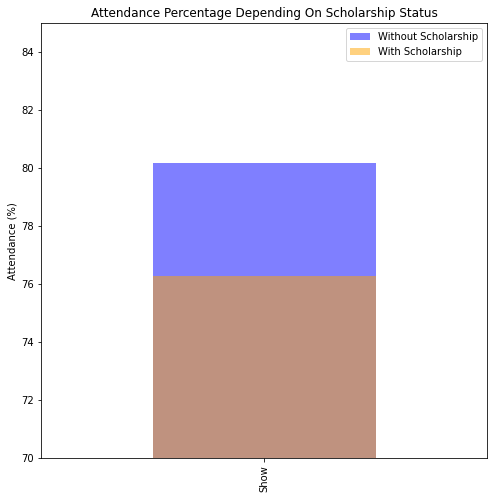

In [80]:
#create masks for scholarship holders and those without
without_scholarship = df.Scholarship == False
with_scholarship = df.Scholarship == True

#Calculate the rates of attendance
attendance_rate_without_scholarship = df.No_Show[without_scholarship].value_counts(normalize = True).iloc[0:1]*100
attendance_rate_with_scholarship = df.No_Show[with_scholarship].value_counts(normalize = True).iloc[0:1]*100

#bar plot over each other
attendance_rate_without_scholarship.plot(kind='bar', alpha=0.5, color='blue', label='Without Scholarship', figsize= (8,8))
attendance_rate_with_scholarship.plot(kind='bar', alpha=0.5, color='orange', label='With Scholarship')

plt.legend();
plt.xticks([0], ['Show']);
plt.title('Attendance Percentage Depending On Scholarship Status')
plt.ylabel('Attendance (%)');
plt.ylim(70, 85);

In [81]:
#caclulate the difference in attendance rates
attendance_difference = attendance_rate_with_scholarship.iloc[0] - attendance_rate_without_scholarship.iloc[0]
print('The difference in Attendance Rates between Scholarship holders and others is: {}%'.format(round(attendance_difference,2)))

The difference in Attendance Rates between Scholarship holders and others is: -3.93%


The analysis of the data indicates that patients with scholarships have a lower rate of appointment attendance.

### Does the time between scheduling and the appointment affect attendance rates?

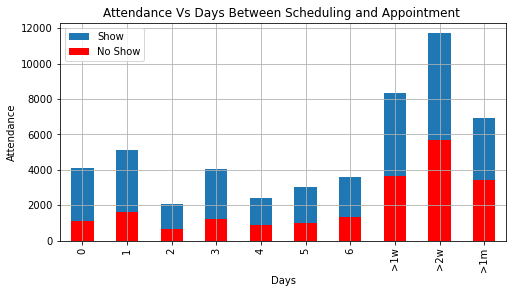

In [82]:
#Use the date only since the AppointmentDay has no time data (all are 00:00)
days_between = df.AppointmentDay.dt.date - df.ScheduledDay.dt.date
#add new column then get the integer number of days
df['DaysBetween'] = days_between
df.DaysBetween = df.DaysBetween.apply(lambda x: x.days)
#some rows got negative values and were dropped
df = df.drop(df.index[df['DaysBetween'] < 0])
#DaysBetween has a very wide range and needs to be cut into groups for better visualizations and intuition
bin_edges = [0, 1, 2, 3, 4, 5 , 6, 7, 14, 30, 900]
bin_names = ['0', '1', '2', '3', '4', '5', '6', '>1w', '>2w', '>1m']
df.DaysBetween = pd.cut(df.DaysBetween, bin_edges, labels=bin_names)

df.DaysBetween[show].value_counts().sort_index().plot(kind='bar', label='Show', figsize= (8,4))
df.DaysBetween[no_show].value_counts().sort_index().plot(kind='bar', label= 'No Show', color='red')

plt.legend();
plt.grid(True)
plt.title('Attendance Vs Days Between Scheduling and Appointment ')
plt.xlabel('Days');
plt.ylabel('Attendance');

In [83]:
#Calculate the attendance rate for the day groups for more insight
def normalize(set_1, set_2):
    s1 = set_1[show].value_counts().sort_index()
    s2 = set_2[no_show].value_counts().sort_index()
    normalized = s1/(s1+s2)
    return normalized

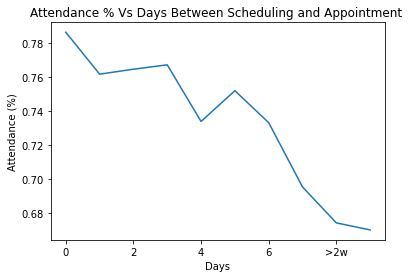

In [84]:
days_between_counts_normalized = normalize(df.DaysBetween[show], df.DaysBetween[no_show])
days_between_counts_normalized.plot()

plt.title('Attendance % Vs Days Between Scheduling and Appointment ')
plt.xlabel('Days');
plt.ylabel('Attendance (%)');

The line plot clearly show an increase in patients missing their appointments as time between when the apointment was scheduled and the appointment day increases.

### Do Older people see the doctor more often?

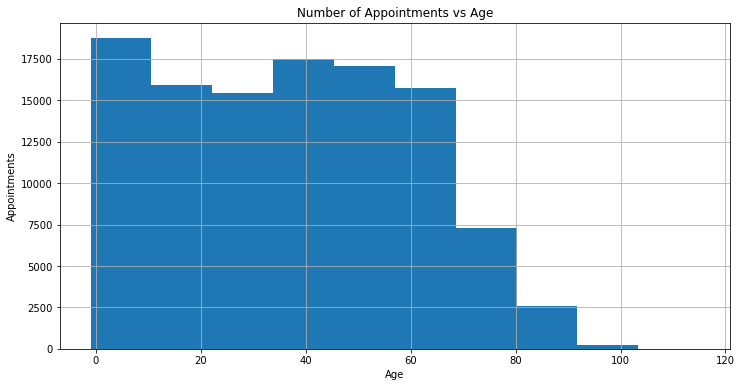

In [85]:
df.Age.hist(figsize=(12,6))
plt.title('Number of Appointments vs Age')
plt.xlabel('Age');
plt.ylabel('Appointments');

The histogram shows that young children less than 10 years old visit the doctors most. The number of patients drops until it picks up again around the age of 40 and then keeps dropping after that.

### Does age have an effect on attendance rates?

The ages need to be seperated into groups:
* 0-12 (children)
* 12-20 (teenagers)
* Then in decades until 80 to cover young adulthood, adulthood, and subsequent ageing phases.

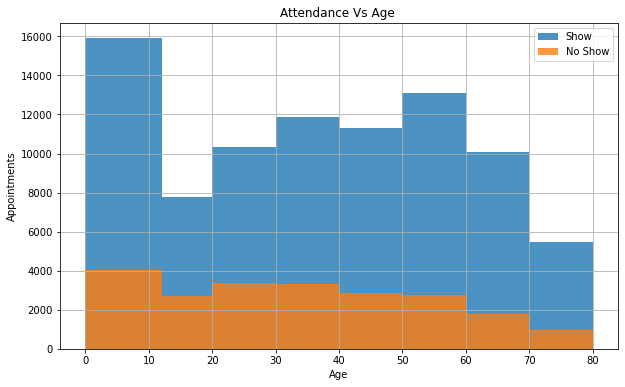

In [86]:
age_bins = [0,12,20,30,40,50,60,70,80]
df.Age[show].hist(alpha=0.8, label='Show', bins=age_bins, figsize=(10,6))
df.Age[no_show].hist(alpha=0.8, label='No Show', bins=age_bins)

plt.legend();
plt.grid(True)
plt.title('Attendance Vs Age ')
plt.xlabel('Age');
plt.ylabel('Appointments');


The histogram shows an increasing trend in appointment attendance rates as the age group advances. It should be noted that children have a high attendance rate compared to teens and young adults.

<a id='conclusions'></a>
## Conclusions

__*Do patients with scholarships have a better rate of attendance?*__

The data indicates that patients with scholarships have a lower rate of attendance. Additional research and analysis should be done before conclusions can be made. The reasons behind this statistic are not clear from this statistic and this correlation is indicative of other misalignments between the two groups. Several factors such as age, income, health status, mobility, distance from health center, transportation and many more could be leading to this outcome. This is relevant considering that this Brazilian scholarship was aimed to aid poor families who face countless factors that could interfere with their attendance.

__*Does the time between scheduling and the appointment affect attendance rates?*__

The trend seems to suggest that a reduction in time between scheduling and appointment date would impact attendance rates. Further data and analysis are needed to confirm this trend as many other factors could be affecting it. One such example is patients no longer feeling the need to attend their appointment as their symptoms dissipate. The nature of the disease or symptoms as well as whether they have a chronic condition could contribute to this analysis.

__*Do Older people see the doctor more often?*__


This analysis is very limited as the number of appointments was not adjusted to the total population of each age group. The analysis shows that young children attend doctors the most while the trend falls until it picks up as adults move into their 40s. This is reasonable as humans tend to develop diseases as they age. The trend then starts to decline again but death is certainly a major contributor to this decline. Other data that could help provide more insight is the nature of the visit to the doctor. A large number of the childrens' appointments could be for vaccines which for many analyses would be considered of a different a category to appointments for diseases. 

__*Does age have an effect on attendance rates?*__
The data indicates that attendance rates increase along with the age of a patient. This could be due to the increase in severity of the disease. Family support, parental assistance, amobility, health status, severity of illness and many more variables have an effect on this outcome. Children have a high attendance rate which could be due to parental support and coercion. Further data on the nature of the appointment could help make better conclusions on the reasons for this correlation.

### Limitations
The data has no information on the nature of the care required. Different types of appointments would attract different levels or urgency and will thus have a great effect on the attendance rate. The appointment date column does not include the appointment's time which is important. When analysing the effect of age on total appointments, If SMS data had a date, we could make an inference on how much forgetfullness affects this outcome as we would know when the patient was last reminded. the analysis did not normalize by population for each age group which limits its significance. 